<a href="https://colab.research.google.com/github/tejaguduri017-png/guduri-teja/blob/main/Sensor_Data_Analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faulty Sensors: ['S2' 'S3']

Anomaly Report:
            Timestamp Sensor_ID  Temperature_C
3 2025-01-01 10:00:00        S2           29.5
4 2025-01-01 10:05:00        S2           30.2
5 2025-01-01 10:10:00        S2           28.9
7 2025-01-01 10:05:00        S3           17.8

Sensor Summary Statistics:
            mean   min   max  count
Sensor_ID                          
S1         24.47  22.5  27.8      3
S2         29.53  28.9  30.2      3
S3         19.13  17.8  20.1      3


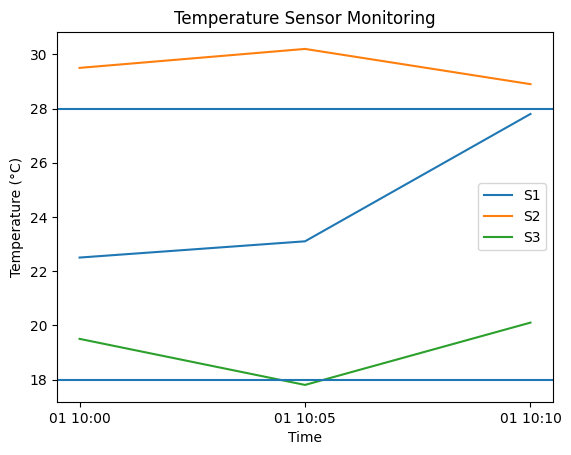

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. CREATE SAMPLE SENSOR DATA
# -----------------------------
data = {
    'Timestamp': [
        '2025-01-01 10:00', '2025-01-01 10:05', '2025-01-01 10:10',
        '2025-01-01 10:00', '2025-01-01 10:05', '2025-01-01 10:10',
        '2025-01-01 10:00', '2025-01-01 10:05', '2025-01-01 10:10'
    ],
    'Sensor_ID': ['S1','S1','S1','S2','S2','S2','S3','S3','S3'],
    'Temperature_C': [22.5, 23.1, 27.8, 29.5, 30.2, 28.9, 19.5, 17.8, 20.1]
}

df = pd.DataFrame(data)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# -----------------------------
# 2. Data Cleaning
# -----------------------------
df = df.dropna()

# -----------------------------
# 3. Anomaly Detection
# Normal range: 18°C – 28°C
# -----------------------------
df['Anomaly'] = df['Temperature_C'].apply(
    lambda x: 'Yes' if x < 18 or x > 28 else 'No'
)

# -----------------------------
# 4. Faulty Sensors
# -----------------------------
faulty_sensors = df[df['Anomaly'] == 'Yes']['Sensor_ID'].unique()
print("Faulty Sensors:", faulty_sensors)

# -----------------------------
# 5. Anomaly Report
# -----------------------------
print("\nAnomaly Report:")
print(df[df['Anomaly'] == 'Yes'][['Timestamp', 'Sensor_ID', 'Temperature_C']])

# -----------------------------
# 6. Summary Statistics
# -----------------------------
summary = df.groupby('Sensor_ID')['Temperature_C'].agg(
    ['mean', 'min', 'max', 'count']
).round(2)

print("\nSensor Summary Statistics:")
print(summary)

# -----------------------------
# 7. Visualization
# -----------------------------
plt.figure()
for sensor in df['Sensor_ID'].unique():
    sensor_data = df[df['Sensor_ID'] == sensor]
    plt.plot(sensor_data['Timestamp'], sensor_data['Temperature_C'], label=sensor)

plt.axhline(18)
plt.axhline(28)
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Sensor Monitoring")
plt.legend()
plt.show()
